<a href="https://colab.research.google.com/github/healerHK/Data_Analyst_Workshop-2/blob/main/job_market_lab2_Thanh_Y_Nguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('/content/sample_data/job-market.csv')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


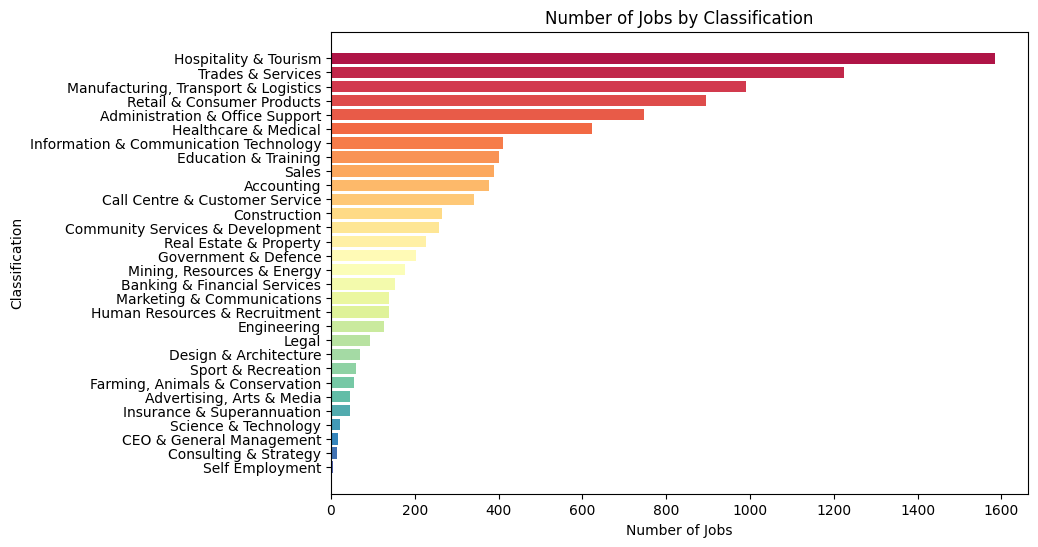

In [14]:
%matplotlib inline

job_counts = df["Classification"].value_counts().reset_index()
job_counts.columns = ["Classification", "Number of Jobs"]
job_counts = job_counts.sort_values(by="Number of Jobs", ascending=False)

plt.figure(figsize=(9, 6))

colors = sns.color_palette("Spectral", len(job_counts))
plt.barh(job_counts["Classification"], job_counts["Number of Jobs"], color=colors)
plt.gca().invert_yaxis()

plt.xlabel("Number of Jobs")
plt.ylabel("Classification")
plt.title("Number of Jobs by Classification")
plt.show()

In [81]:
import matplotlib
#create dataframe for salary ranges

salary_range_df = df.groupby(['LowestSalary', 'HighestSalary']).agg({
    'Id': 'count',
    'Title': 'count',
    'Company': 'count',
    'Date': 'count',
    'Location': 'count',
    'Area': 'count',
    'Classification': 'count',
    'SubClassification': 'count',
    'Requirement': 'count',
    'FullDescription': 'count',
    'JobType': 'count'
}).reset_index()

salary_range_df['Label'] = salary_range_df['LowestSalary']
salary_range_df['Label'] = salary_range_df['Label'].round(2)
salary_range_df['Count'] = salary_range_df['Id']

final_salary_range_df = salary_range_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black'), ('font-weight', 'bold')]},
])

# Display the result
final_salary_range_df



,LowestSalary,HighestSalary,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,JobType,Label,Count
0,0.000000,30.000000,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3740,0.000000,3894
1,30.000000,40.000000,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1816,30.000000,1842
2,40.000000,50.000000,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2475,40.000000,2519
3,50.000000,60.000000,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1821,50.000000,1844


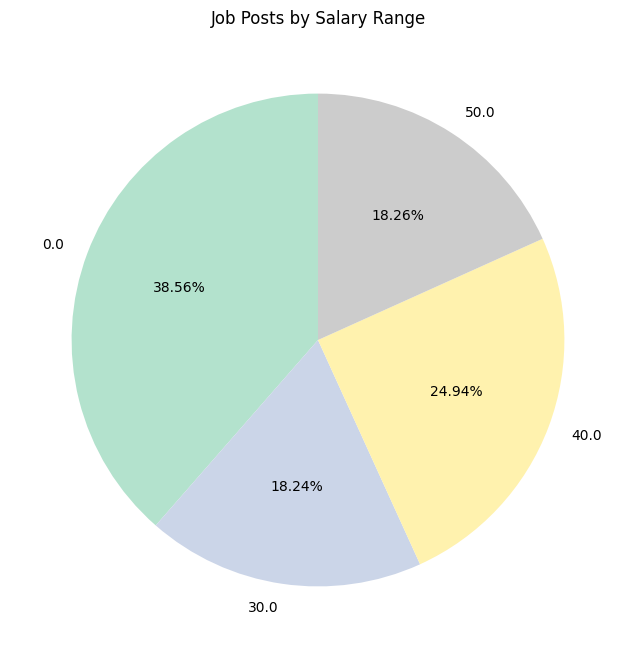

In [61]:
#salary ranges plot

pie_data = salary_range_df.groupby('Label')['Count'].sum()

plt.figure(figsize=(8, 8))
pie_data.plot(kind='pie', autopct='%1.2f%%', startangle=90, labels=pie_data.index, colormap='Pastel2')

plt.title('Job Posts by Salary Range')

plt.ylabel('')
plt.show()

In [62]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Location,Count
Location,,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,238,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,390,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,19,Albury Area,19


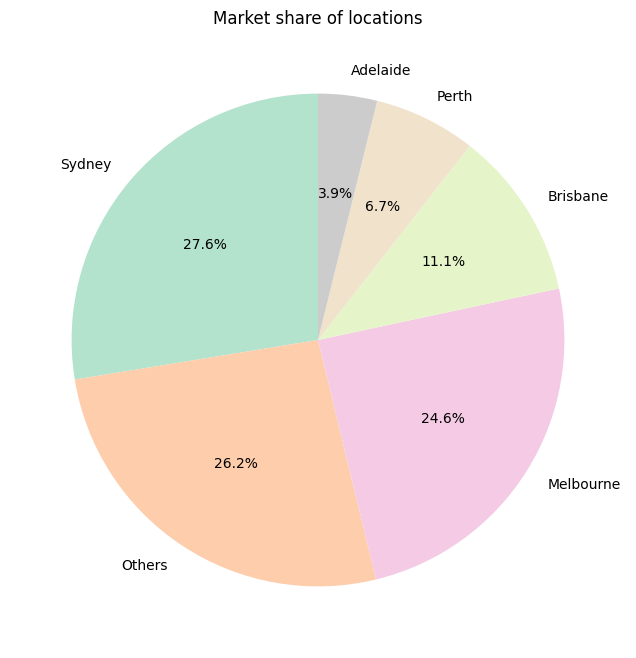

In [80]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

cities_df = df.copy()

cities_df['Location'] = cities_df['Location'].apply(lambda x: x if x in ['Brisbane', 'Sydney', 'Melbourne', 'Perth', 'Adelaide'] else 'Others')

city_market_share = cities_df.groupby('Location')['Id'].count()
city_market_share = city_market_share.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
city_market_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Pastel2' )

plt.title('Market share of locations')
plt.ylabel('')
plt.show()
